In [2]:
import pandas as pd

df1 = pd.read_csv('/workspaces/air-quality-politics/data/el_f_dataset.csv')
df2 = pd.read_csv('/workspaces/air-quality-politics/data/gobiernos_espana_2013_2023_por_mes.csv')
df3 =  pd.read_csv('/workspaces/air-quality-politics/data/raw/resultado_final_todo_con_gobierno_y_edades.csv',  sep=";") 

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584064 entries, 0 to 584063
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Sexo                      584064 non-null  object 
 1   Grupo9Edad                584064 non-null  object 
 2   Codigo_Provincia          584064 non-null  int64  
 3   Anio                      584064 non-null  int64  
 4   Mes                       584064 non-null  int64  
 5   Total                     584064 non-null  float64
 6   Tasa_mortalidad_por_1000  584064 non-null  float64
 7   Total_causa               584064 non-null  float64
 8   VALOR_ICA                 108774 non-null  float64
 9   CATEGORIA_ICA             108774 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 44.6+ MB


In [4]:
print(df1.columns)
print(df2.columns)

Index(['Sexo', 'Grupo9Edad', 'Codigo_Provincia', 'Anio', 'Mes', 'Total',
       'Tasa_mortalidad_por_1000', 'Total_causa', 'VALOR_ICA',
       'CATEGORIA_ICA'],
      dtype='object')
Index(['AÑO_MES', 'Periodo', 'Nivel', 'Entidad', 'Partido', 'Fecha'], dtype='object')


In [5]:
df2['Fecha'] = pd.to_datetime(df2['Fecha'], errors='coerce')

# Extraer el año de 'Fecha' en df2
df2['Anio'] = df2['Fecha'].dt.year

# Unir los DataFrames por el campo 'Anio'
df_merged = pd.merge(df1, df2, on='Anio', how='inner')

# Mostrar las primeras filas del DataFrame resultante
print(df_merged.head())

      Sexo Grupo9Edad  Codigo_Provincia  Anio  Mes        Total  \
0  Hombres        0-4                 1  2013    1  8765.375227   
1  Hombres        0-4                 1  2013    1  8765.375227   
2  Hombres        0-4                 1  2013    1  8765.375227   
3  Hombres        0-4                 1  2013    1  8765.375227   
4  Hombres        0-4                 1  2013    1  8765.375227   

   Tasa_mortalidad_por_1000  Total_causa  VALOR_ICA CATEGORIA_ICA  AÑO_MES  \
0                      4.24        320.0   18.07288         Buena  2013-01   
1                      4.24        320.0   18.07288         Buena  2013-02   
2                      4.24        320.0   18.07288         Buena  2013-03   
3                      4.24        320.0   18.07288         Buena  2013-04   
4                      4.24        320.0   18.07288         Buena  2013-05   

     Periodo                 Nivel    Entidad Partido      Fecha  
0  2013–2015      Gobierno Central     España      PP 2013-01

Dimensiones del dataset: (1347840, 16)

Tipos de datos:
Sexo                                object
Grupo9Edad                          object
Codigo_Provincia                     int64
Anio                                 int64
Mes                                  int64
Total                              float64
Tasa_mortalidad_por_1000           float64
Total_causa                        float64
VALOR_ICA                          float64
CATEGORIA_ICA                       object
AÑO_MES                             object
Periodo                             object
Nivel                               object
Entidad                             object
Partido                             object
Fecha                       datetime64[ns]
dtype: object

Primeras filas:
      Sexo Grupo9Edad  Codigo_Provincia  Anio  Mes        Total  \
0  Hombres        0-4                 1  2013    1  8765.375227   
1  Hombres        0-4                 1  2013    1  8765.375227   
2  Hombres        0-4   

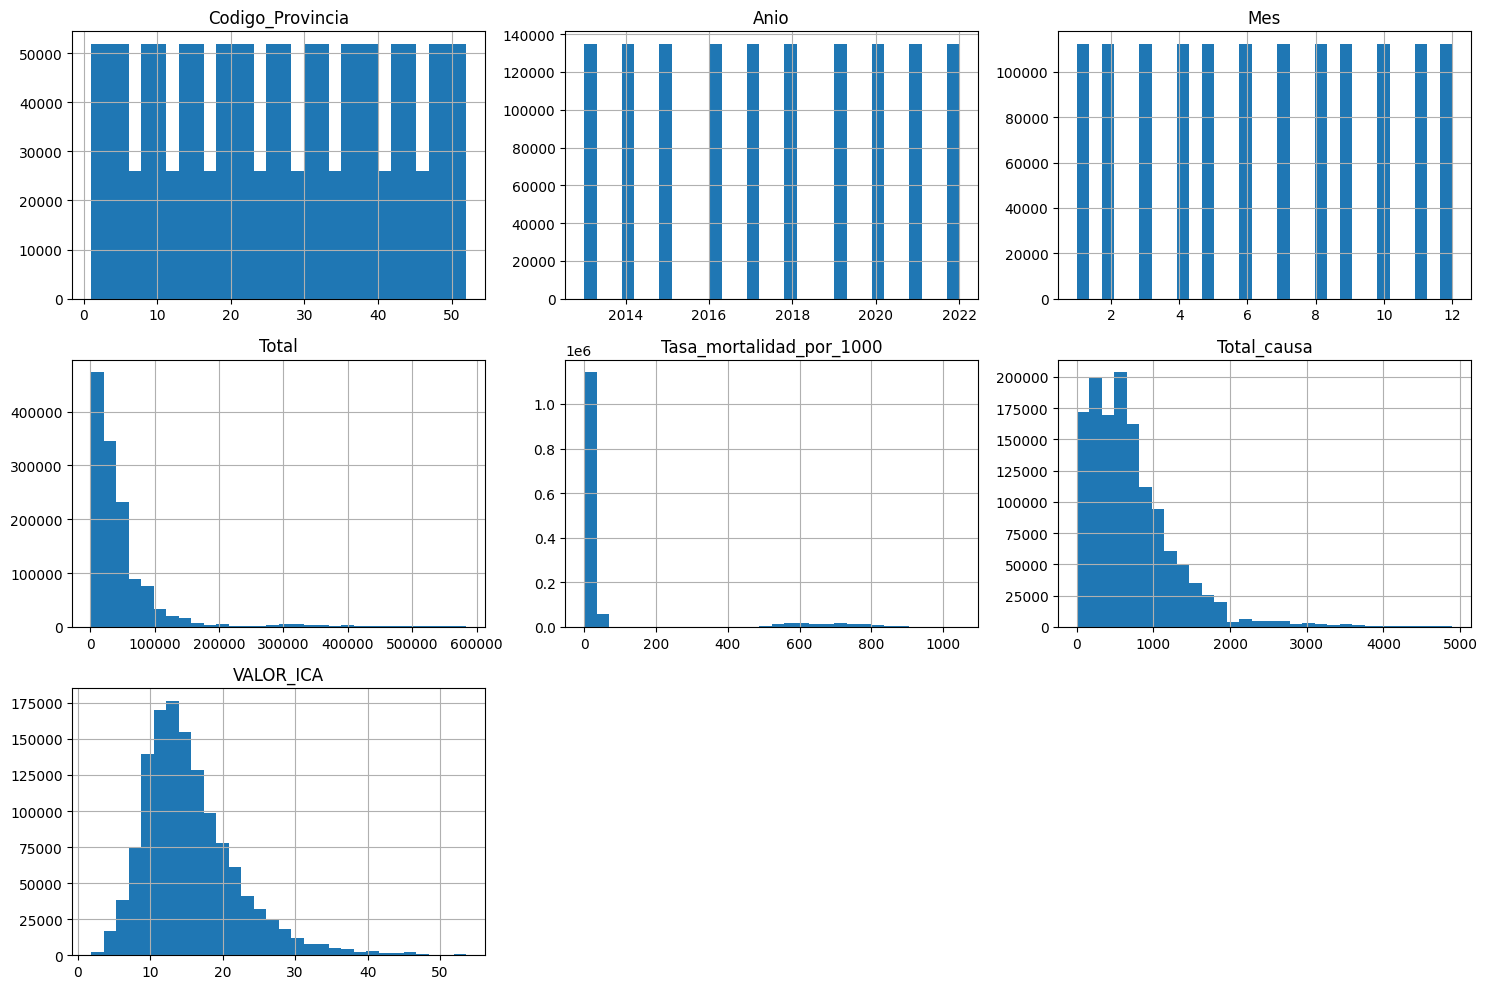

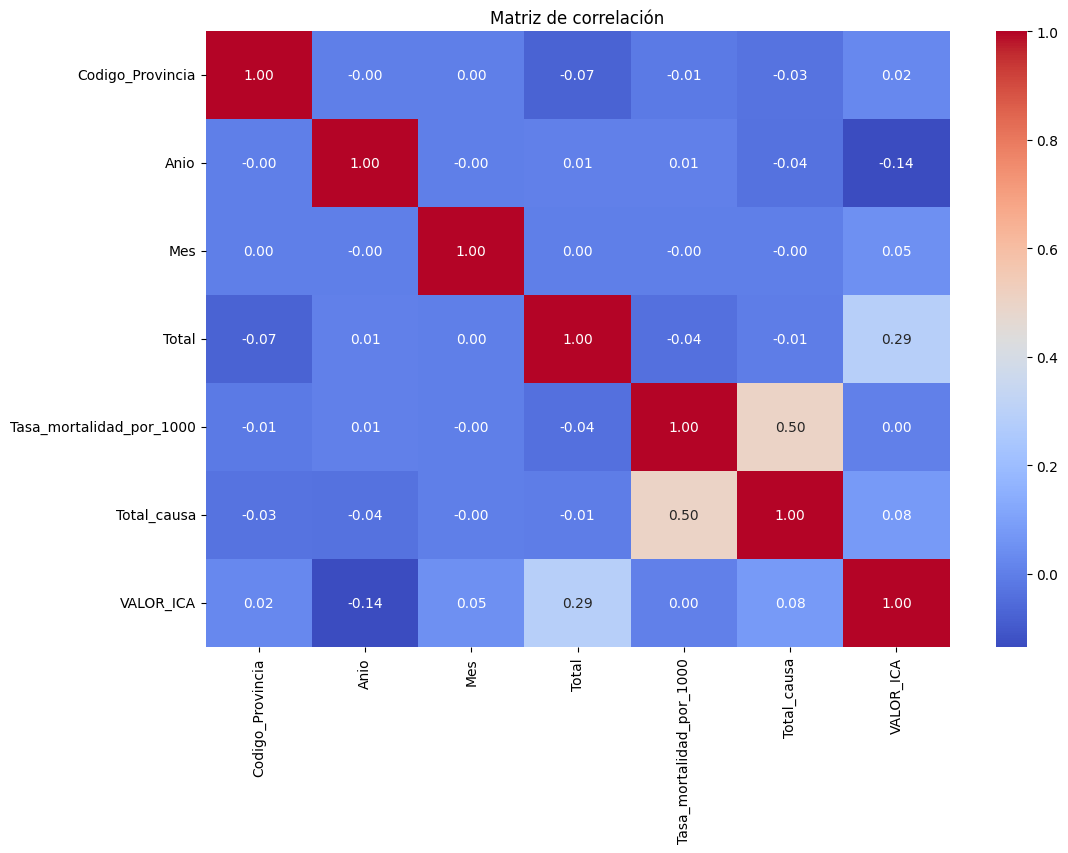

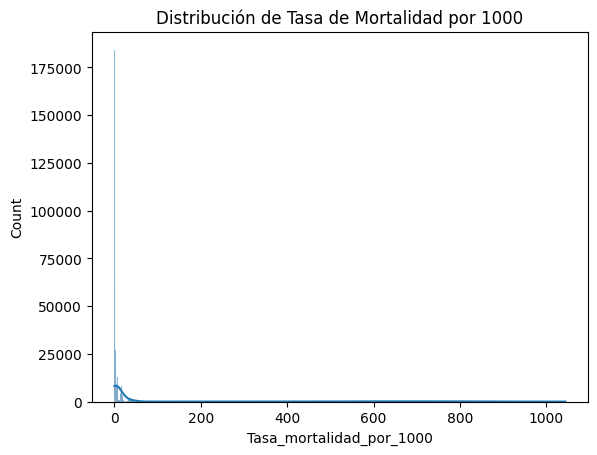


Frecuencia de Partido:
Partido
PSOE                               449280
PP                                 381888
PNV                                 89856
PP / PSOE                           78624
IU                                  56160
CC                                  33696
PSPV-PSOE                           33696
UPN                                 22464
CiU                                 22464
ERC                                 22464
BNG                                 22464
DO                                  22464
PSOE-Unidas Podemos (coalición)     22464
PSOE / PP                           22464
Ahora Madrid / Más Madrid           11232
PSOE / ERC                          11232
Junts / ERC                         11232
Más Madrid / PP                     11232
Compromís                           11232
Barcelona en Comú / PSC             11232
Name: count, dtype: int64


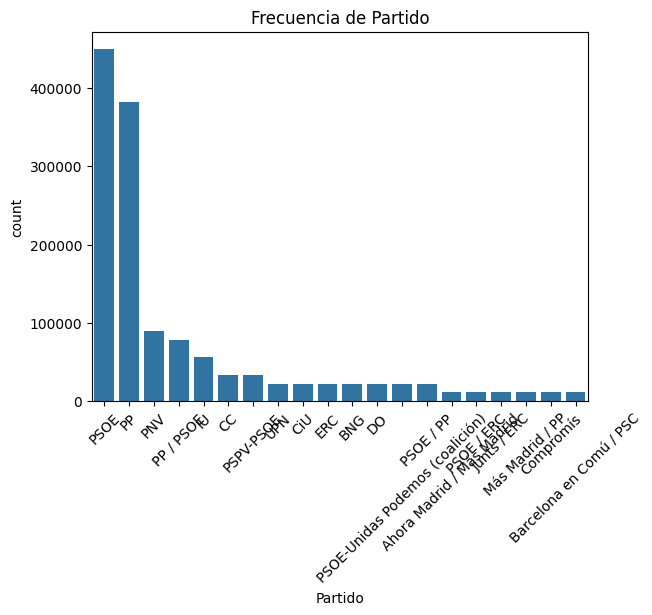


Frecuencia de Nivel:
Nivel
Capital de Provincia    965952
Comunidad Autónoma      336960
Gobierno Central         44928
Name: count, dtype: int64


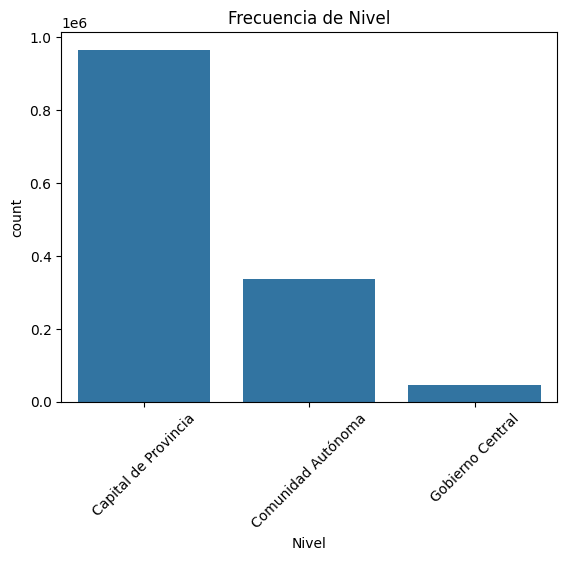


Frecuencia de Entidad:
Entidad
Zamora                  56160
España                  44928
Zaragoza                44928
Córdoba                 44928
Álava                   44928
Cádiz                   44928
Asturias                33696
Almería                 33696
Islas Baleares          33696
Jaén                    33696
La Rioja                33696
Pontevedra              33696
Cáceres                 33696
Huesca                  33696
Melilla                 33696
Burgos                  33696
Huelva                  33696
Canarias                33696
Girona                  33696
Granada                 33696
Comunidad Valenciana    33696
Murcia                  33696
León                    22464
Andalucía               22464
Pamplona                22464
Valladolid              22464
Santander               22464
Bilbao                  22464
Valencia                22464
Soria                   22464
Ourense                 22464
Málaga                  22464
Toledo  

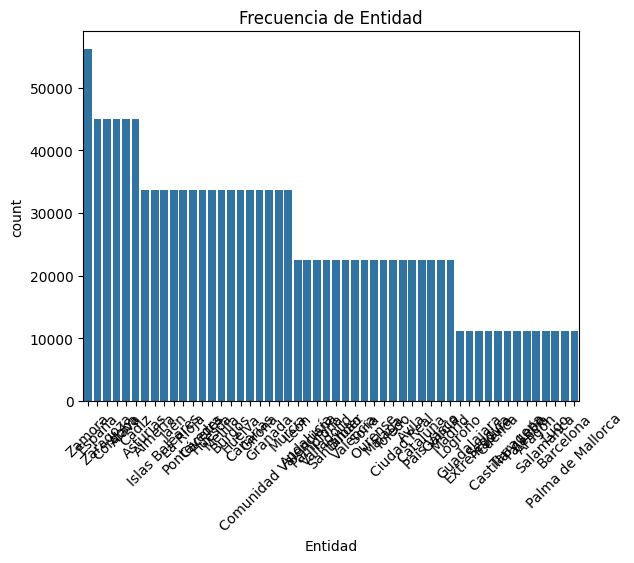

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Dimensiones del dataset ---
print("Dimensiones del dataset:", df_merged.shape)

# --- Tipos de datos ---
print("\nTipos de datos:")
print(df_merged.dtypes)

# --- Primeras filas ---
print("\nPrimeras filas:")
print(df_merged.head())

# --- Estadísticas descriptivas ---
print("\nEstadísticas descriptivas:")
print(df_merged.describe(include='all'))

# --- Valores nulos ---
print("\nValores nulos por columna:")
print(df_merged.isnull().sum())

# --- Distribución de variables numéricas ---
df_merged.select_dtypes(include='number').hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# --- Correlación entre variables numéricas ---
plt.figure(figsize=(12,8))
sns.heatmap(df_merged.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# --- Distribución de la variable objetivo (si tienes una en mente) ---
# Ejemplo: Tasa de mortalidad
sns.histplot(df_merged['Tasa_mortalidad_por_1000'], kde=True)
plt.title('Distribución de Tasa de Mortalidad por 1000')
plt.show()

# --- Categóricas: frecuencia por partido, nivel, etc. ---
for col in ['Partido', 'Nivel', 'Entidad']:
    if col in df_merged.columns:
        print(f"\nFrecuencia de {col}:")
        print(df_merged[col].value_counts())
        sns.countplot(data=df_merged, x=col, order=df_merged[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Frecuencia de {col}')
        plt.show()

In [7]:
muertes_por_mes = df_merged.groupby(['Anio', 'Mes'])['Total'].count().reset_index()
muertes_por_mes.columns = ['Anio', 'Mes', 'Recuentos']
print(muertes_por_mes.sort_values(['Anio', 'Mes']))

     Anio  Mes  Recuentos
0    2013    1      11232
1    2013    2      11232
2    2013    3      11232
3    2013    4      11232
4    2013    5      11232
..    ...  ...        ...
115  2022    8      11232
116  2022    9      11232
117  2022   10      11232
118  2022   11      11232
119  2022   12      11232

[120 rows x 3 columns]


In [8]:
df3.head()

,codigo_provincia_x,nombre_provincia,año,sexo,edad,poblacion,tasa_def_tot_1000hab,muertes_totales,muertes_respiratorias,proporcion_muerte_respiratoria,...,provincia_oficial,codigo_provincia_y,provincia,provincia_gobierno_norm,Entidad_merge,mes,Entidad_norm,partido_gobernante_mes,edad_min,edad_max
0,1,ARABA ALAVA,2013,hombres,0-4,1286,2.12,3,0,0.0,...,ÁLAVA,1.0,ÁLAVA,ALAVA,ALAVA,1,NaN,PNV,NaN,NaN
1,1,ARABA ALAVA,2013,hombres,15-24,2024,0.35,1,0,0.0,...,ÁLAVA,1.0,ÁLAVA,ALAVA,ALAVA,1,NaN,PNV,NaN,NaN
2,1,ARABA ALAVA,2013,hombres,25-34,4296,0.82,4,0,0.0,...,ÁLAVA,1.0,ÁLAVA,ALAVA,ALAVA,1,NaN,PNV,NaN,NaN
3,1,ARABA ALAVA,2013,hombres,35-44,4050,0.82,3,6,2.0,...,ÁLAVA,1.0,ÁLAVA,ALAVA,ALAVA,1,NaN,PNV,NaN,NaN
4,1,ARABA ALAVA,2013,hombres,45-54,1642,3.19,5,39,7.8,...,ÁLAVA,1.0,ÁLAVA,ALAVA,ALAVA,1,NaN,PNV,NaN,NaN


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   codigo_provincia_x                9360 non-null   int64  
 1   nombre_provincia                  9360 non-null   object 
 2   año                               9360 non-null   int64  
 3   sexo                              9360 non-null   object 
 4   edad                              9360 non-null   object 
 5   poblacion                         9360 non-null   int64  
 6   tasa_def_tot_1000hab              9360 non-null   float64
 7   muertes_totales                   9360 non-null   int64  
 8   muertes_respiratorias             9360 non-null   int64  
 9   proporcion_muerte_respiratoria    7527 non-null   float64
 10  tasa_muerte_respiratoria_1000hab  9360 non-null   float64
 11  VALOR_ICA                         9360 non-null   float64
 12  CATEGO

In [10]:
df3.describe()

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,codigo_provincia_x,año,poblacion,tasa_def_tot_1000hab,muertes_totales,muertes_respiratorias,proporcion_muerte_respiratoria,tasa_muerte_respiratoria_1000hab,VALOR_ICA,LATITUD_MEDIA,LONGITUD_MEDIA,ALTITUD_MEDIA,codigo_provincia_y,mes,edad_min,edad_max
count,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,7527.0,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.0,0.0,0.0
mean,26.500000,2017.500000,3302.436645,17.812645,96.251923,33.761432,inf,41.343458,15.180769,39.911668,-3.810808,417.930732,26.500000,1.0,NaN,NaN
std,15.009133,2.872435,2716.600673,42.533044,281.108760,61.520790,NaN,170.766652,4.237292,3.194209,3.616418,311.873868,15.009133,0.0,NaN,NaN
min,1.000000,2013.000000,19.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.470000,28.295935,-16.709137,1.000000,1.000000,1.0,NaN,NaN
25%,13.750000,2015.000000,992.750000,0.290000,1.000000,0.000000,0.0,0.000000,12.217500,38.274032,-5.802549,137.261905,13.750000,1.0,NaN,NaN
50%,26.500000,2017.500000,2677.000000,1.290000,2.000000,3.000000,1.0,0.909000,15.000000,40.830353,-3.645390,357.555556,26.500000,1.0,NaN,NaN
75%,39.250000,2020.000000,5111.500000,7.380000,10.000000,43.000000,6.0,23.723500,17.395000,42.138146,-1.807605,682.886364,39.250000,1.0,NaN,NaN
max,52.000000,2022.000000,14732.000000,208.850000,2187.000000,565.000000,inf,3402.778000,28.160000,43.415440,2.820357,1150.000000,52.000000,1.0,NaN,NaN


In [11]:
import pandas as pd
import numpy as np

# Suponiendo que df es tu DataFrame original
meses = list(range(1, 13))  # meses del 1 al 12

# Repetir cada fila 12 veces
df = df3.loc[df3.index.repeat(12)].copy()

# Asignar los meses (1 a 12 en orden repetido)
df["mes"] = meses * len(df3)

In [12]:
print(len(df)) 

112320


In [13]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 112320 entries, 0 to 9359
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   codigo_provincia_x                112320 non-null  int64  
 1   nombre_provincia                  112320 non-null  object 
 2   año                               112320 non-null  int64  
 3   sexo                              112320 non-null  object 
 4   edad                              112320 non-null  object 
 5   poblacion                         112320 non-null  int64  
 6   tasa_def_tot_1000hab              112320 non-null  float64
 7   muertes_totales                   112320 non-null  int64  
 8   muertes_respiratorias             112320 non-null  int64  
 9   proporcion_muerte_respiratoria    90324 non-null   float64
 10  tasa_muerte_respiratoria_1000hab  112320 non-null  float64
 11  VALOR_ICA                         112320 non-null  float64


/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,codigo_provincia_x,año,poblacion,tasa_def_tot_1000hab,muertes_totales,muertes_respiratorias,proporcion_muerte_respiratoria,tasa_muerte_respiratoria_1000hab,VALOR_ICA,LATITUD_MEDIA,LONGITUD_MEDIA,ALTITUD_MEDIA,codigo_provincia_y,mes,edad_min,edad_max
count,112320.000000,112320.000000,112320.000000,112320.000000,112320.000000,112320.000000,90324.0,112320.000000,112320.000000,112320.000000,112320.000000,112320.000000,112320.000000,112320.000000,0.0,0.0
mean,26.500000,2017.500000,3302.436645,17.812645,96.251923,33.761432,inf,41.343458,15.180769,39.911668,-3.810808,417.930732,26.500000,6.500000,NaN,NaN
std,15.008398,2.872294,2716.467645,42.530961,281.094995,61.517777,NaN,170.758290,4.237085,3.194052,3.616241,311.858596,15.008398,3.452068,NaN,NaN
min,1.000000,2013.000000,19.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.470000,28.295935,-16.709137,1.000000,1.000000,1.000000,NaN,NaN
25%,13.750000,2015.000000,992.750000,0.290000,1.000000,0.000000,0.0,0.000000,12.217500,38.274032,-5.802549,137.261905,13.750000,3.750000,NaN,NaN
50%,26.500000,2017.500000,2677.000000,1.290000,2.000000,3.000000,1.0,0.909000,15.000000,40.830353,-3.645390,357.555556,26.500000,6.500000,NaN,NaN
75%,39.250000,2020.000000,5111.500000,7.380000,10.000000,43.000000,6.0,23.723500,17.395000,42.138146,-1.807605,682.886364,39.250000,9.250000,NaN,NaN
max,52.000000,2022.000000,14732.000000,208.850000,2187.000000,565.000000,inf,3402.778000,28.160000,43.415440,2.820357,1150.000000,52.000000,12.000000,NaN,NaN


1.1. Eliminar columnas inútiles

In [14]:
df.drop(columns=["edad_min", "edad_max"], inplace=True)

1.2. Reemplazar inf y manejar NaN

In [15]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isna().sum().sort_values(ascending=False)

Entidad_norm                        110592
partido_gobernante_mes               54432
proporcion_muerte_respiratoria       27996
Entidad_merge                        17280
año                                      0
poblacion                                0
edad                                     0
tasa_def_tot_1000hab                     0
sexo                                     0
nombre_provincia                         0
codigo_provincia_x                       0
tasa_muerte_respiratoria_1000hab         0
muertes_respiratorias                    0
muertes_totales                          0
VALOR_ICA                                0
LONGITUD_MEDIA                           0
CATEGORIA_ICA                            0
CONTAMINANTE                             0
LATITUD_MEDIA                            0
ZONA_MAS_FREC                            0
TIPO_AREA_MAS_FREC                       0
ALTITUD_MEDIA                            0
provincia_oficial                        0
provincia_g

Rellenar el partido del año para todos los meses de ese mismo año

In [16]:
df['partido_gobernante_mes'] = df.groupby(['provincia', 'año'])['partido_gobernante_mes'].transform(lambda x: x.ffill().bfill())

/tmp/ipykernel_2620/1129036488.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['partido_gobernante_mes'] = df.groupby(['provincia', 'año'])['partido_gobernante_mes'].transform(lambda x: x.ffill().bfill())


In [17]:
partidos_por_grupo = df.groupby(['provincia', 'año'])['partido_gobernante_mes'].nunique()
print(partidos_por_grupo.value_counts())

partido_gobernante_mes
1    268
0    252
Name: count, dtype: int64


In [18]:
print(df['partido_gobernante_mes'].unique())

['PNV' 'PP' 'PSPV-PSOE' 'PSOE' 'ERC' 'Más Madrid / PP' nan]


In [19]:
print(df[df['partido_gobernante_mes'].isna()])

      codigo_provincia_x nombre_provincia   año     sexo edad  poblacion  \
4824                  28           MADRID  2021  hombres  0-4        149   
4824                  28           MADRID  2021  hombres  0-4        149   
4824                  28           MADRID  2021  hombres  0-4        149   
4824                  28           MADRID  2021  hombres  0-4        149   
4824                  28           MADRID  2021  hombres  0-4        149   
...                  ...              ...   ...      ...  ...        ...   
9359                  48          BIZKAIA  2022  mujeres  75+       3878   
9359                  48          BIZKAIA  2022  mujeres  75+       3878   
9359                  48          BIZKAIA  2022  mujeres  75+       3878   
9359                  48          BIZKAIA  2022  mujeres  75+       3878   
9359                  48          BIZKAIA  2022  mujeres  75+       3878   

      tasa_def_tot_1000hab  muertes_totales  muertes_respiratorias  \
4824             

In [20]:
# Suponiendo que la columna partido se llama 'partido_gobernante_mes' y está a nivel anual

# Rellenar partido para todos los meses en un mismo año y provincia, tomando el primer partido disponible
df['partido_gobernante_mes'] = df.groupby(['codigo_provincia_x', 'año'])['partido_gobernante_mes'].transform('first')


In [21]:
partidos_unicos = df.groupby(['codigo_provincia_x', 'año'])['partido_gobernante_mes'].nunique()

print(partidos_unicos.value_counts())  # Ideal: sólo 1 en todos los casos

partido_gobernante_mes
1    268
0    252
Name: count, dtype: int64


In [22]:
print(df['partido_gobernante_mes'].isna().sum())

54432


In [23]:
df['partido_gobernante_mes'] = df.groupby(['codigo_provincia_x', 'año'])['partido_gobernante_mes'].transform(lambda x: x.ffill().bfill())

In [24]:
print(df['partido_gobernante_mes'].isna().sum()) 

54432


In [25]:
# Rellenar partido en todos los meses del año por provincia
df['partido_gobernante_mes'] = df.groupby(['codigo_provincia_x', 'año'])['partido_gobernante_mes'].transform('first')

In [26]:
# Debe dar 0 si todo está bien
print("Faltantes:", df['partido_gobernante_mes'].isna().sum())


Faltantes: 54432


In [27]:
df['partido_gobernante_mes'] = (
    df.groupby(['codigo_provincia_x', 'año'])['partido_gobernante_mes']
      .transform(lambda x: x.ffill().bfill())
)

In [28]:
print("Faltantes después:", df['partido_gobernante_mes'].isna().sum())

Faltantes después: 54432


In [30]:
df.columns

Index(['codigo_provincia_x', 'nombre_provincia', 'año', 'sexo', 'edad',
       'poblacion', 'tasa_def_tot_1000hab', 'muertes_totales',
       'muertes_respiratorias', 'proporcion_muerte_respiratoria',
       'tasa_muerte_respiratoria_1000hab', 'VALOR_ICA', 'CATEGORIA_ICA',
       'CONTAMINANTE', 'LATITUD_MEDIA', 'LONGITUD_MEDIA', 'ALTITUD_MEDIA',
       'TIPO_AREA_MAS_FREC', 'ZONA_MAS_FREC', 'provincia_oficial',
       'codigo_provincia_y', 'provincia', 'provincia_gobierno_norm',
       'Entidad_merge', 'mes', 'Entidad_norm', 'partido_gobernante_mes'],
      dtype='object')

In [31]:
df.apply(lambda col: col.astype(str).str.contains('PP|PSOE|PNV|ERC|PSPV', case=False, na=False).sum())


codigo_provincia_x                      0
nombre_provincia                        0
año                                     0
sexo                                    0
edad                                    0
poblacion                               0
tasa_def_tot_1000hab                    0
muertes_totales                         0
muertes_respiratorias                   0
proporcion_muerte_respiratoria          0
tasa_muerte_respiratoria_1000hab        0
VALOR_ICA                               0
CATEGORIA_ICA                           0
CONTAMINANTE                            0
LATITUD_MEDIA                           0
LONGITUD_MEDIA                          0
ALTITUD_MEDIA                           0
TIPO_AREA_MAS_FREC                      0
ZONA_MAS_FREC                       34560
provincia_oficial                       0
codigo_provincia_y                      0
provincia                               0
provincia_gobierno_norm                 0
Entidad_merge                     

In [32]:
df['Entidad_merge'].dropna().unique()[:10]
df['Entidad_norm'].dropna().unique()[:10]

array(['ALAVA', 'BURGOS', 'COMUNIDAD VALENCIANA', 'CUENCA', 'GIRONA',
       'HUESCA', 'LUGO', 'MADRID'], dtype=object)

In [34]:
df['Partido'].unique()

KeyError: 'Partido'

In [35]:
print(df.columns.tolist())

['codigo_provincia_x', 'nombre_provincia', 'año', 'sexo', 'edad', 'poblacion', 'tasa_def_tot_1000hab', 'muertes_totales', 'muertes_respiratorias', 'proporcion_muerte_respiratoria', 'tasa_muerte_respiratoria_1000hab', 'VALOR_ICA', 'CATEGORIA_ICA', 'CONTAMINANTE', 'LATITUD_MEDIA', 'LONGITUD_MEDIA', 'ALTITUD_MEDIA', 'TIPO_AREA_MAS_FREC', 'ZONA_MAS_FREC', 'provincia_oficial', 'codigo_provincia_y', 'provincia', 'provincia_gobierno_norm', 'Entidad_merge', 'mes', 'Entidad_norm', 'partido_gobernante_mes']


In [37]:
# Crear tabla con los partidos por provincia y año
df_partidos_anio = df[['provincia', 'año', 'partido_gobernante_mes']].dropna().drop_duplicates()

# Renombrar para que quede claro que es anual
df_partidos_anio = df_partidos_anio.rename(columns={'partido_gobernante_mes': 'partido_gobernante_anio'})


In [38]:
# Unir para recuperar partido a nivel anual
df = df.merge(df_partidos_anio, on=['provincia', 'año'], how='left')


In [40]:
# Rellenar donde falte el dato mensual
df['partido_gobernante_mes'] = df['partido_gobernante_mes'].fillna(df['partido_gobernante_anio'])

# Eliminar columna de respaldo
df = df.drop(columns=['partido_gobernante_anio'])

KeyError: 'partido_gobernante_anio'

In [42]:
df_partidos_anio = df[['provincia', 'año', 'partido_gobernante_mes']].dropna().drop_duplicates()

# 2. Renombrar columna para diferenciar
df_partidos_anio = df_partidos_anio.rename(columns={'partido_gobernante_mes': 'partido_gobernante_anio'})

# 3. Unir con el dataframe original para agregar la info anual
df = df.merge(df_partidos_anio, on=['provincia', 'año'], how='left')

# 4. Rellenar los NaN de 'partido_gobernante_mes' con el valor anual
df['partido_gobernante_mes'] = df['partido_gobernante_mes'].fillna(df['partido_gobernante_anio'])

# 5. Borrar la columna temporal
df = df.drop(columns=['partido_gobernante_anio'])

# 6. Revisar cuántos valores siguen faltando
print("Faltantes después:", df['partido_gobernante_mes'].isna().sum())

Faltantes después: 54432


In [43]:
df_partidos_anio = df[['provincia', 'año', 'partido_gobernante_mes']].dropna().drop_duplicates()
df_partidos_anio = df_partidos_anio.rename(columns={'partido_gobernante_mes': 'partido_gobernante_anio'})


In [44]:
df = df.merge(df_partidos_anio, on=['provincia', 'año'], how='left')


In [45]:
df['partido_gobernante_mes'] = df['partido_gobernante_mes'].fillna(df['partido_gobernante_anio'])


In [46]:
df = df.drop(columns=['partido_gobernante_anio'])


In [47]:
print("Faltantes después:", df['partido_gobernante_mes'].isna().sum())


Faltantes después: 54432


In [48]:
faltantes = df[df['partido_gobernante_mes'].isna()]
print(faltantes)

        codigo_provincia_x nombre_provincia   año     sexo edad  poblacion  \
57888                   28           MADRID  2021  hombres  0-4        149   
57889                   28           MADRID  2021  hombres  0-4        149   
57890                   28           MADRID  2021  hombres  0-4        149   
57891                   28           MADRID  2021  hombres  0-4        149   
57892                   28           MADRID  2021  hombres  0-4        149   
...                    ...              ...   ...      ...  ...        ...   
112315                  48          BIZKAIA  2022  mujeres  75+       3878   
112316                  48          BIZKAIA  2022  mujeres  75+       3878   
112317                  48          BIZKAIA  2022  mujeres  75+       3878   
112318                  48          BIZKAIA  2022  mujeres  75+       3878   
112319                  48          BIZKAIA  2022  mujeres  75+       3878   

        tasa_def_tot_1000hab  muertes_totales  muertes_respirat

In [49]:
# Filtrar filas donde 'partido_gobernante_mes' es NaN
faltantes = df[df['partido_gobernante_mes'].isna()]

# Contar faltantes por provincia y año
resumen_faltantes = faltantes.groupby(['nombre_provincia', 'año']).size().reset_index(name='faltantes')

# Ordenar para identificar dónde hay más faltantes
resumen_faltantes = resumen_faltantes.sort_values(by='faltantes', ascending=False)

print(resumen_faltantes)

     nombre_provincia   año  faltantes
0    ALICANTE ALACANT  2013        216
1    ALICANTE ALACANT  2014        216
2    ALICANTE ALACANT  2015        216
3    ALICANTE ALACANT  2016        216
4    ALICANTE ALACANT  2017        216
..                ...   ...        ...
247          ZARAGOZA  2018        216
248          ZARAGOZA  2019        216
249          ZARAGOZA  2020        216
250          ZARAGOZA  2021        216
251          ZARAGOZA  2022        216

[252 rows x 3 columns]


In [50]:
faltantes_por_provincia_anio = df[df['partido_gobernante_mes'].isna()] \
    .groupby(['nombre_provincia', 'año'])['partido_gobernante_mes'] \
    .count() \
    .reset_index(name='faltantes')

# Mostrar el resultado
print(faltantes_por_provincia_anio)


     nombre_provincia   año  faltantes
0    ALICANTE ALACANT  2013          0
1    ALICANTE ALACANT  2014          0
2    ALICANTE ALACANT  2015          0
3    ALICANTE ALACANT  2016          0
4    ALICANTE ALACANT  2017          0
..                ...   ...        ...
247          ZARAGOZA  2018          0
248          ZARAGOZA  2019          0
249          ZARAGOZA  2020          0
250          ZARAGOZA  2021          0
251          ZARAGOZA  2022          0

[252 rows x 3 columns]


In [51]:
faltantes_por_provincia_anio = df.groupby(['nombre_provincia', 'año'])['partido_gobernante_mes'] \
    .apply(lambda x: x.isna().sum()) \
    .reset_index(name='faltantes')

print(faltantes_por_provincia_anio)

    nombre_provincia   año  faltantes
0           ALBACETE  2013          0
1           ALBACETE  2014          0
2           ALBACETE  2015          0
3           ALBACETE  2016          0
4           ALBACETE  2017          0
..               ...   ...        ...
515         ZARAGOZA  2018        216
516         ZARAGOZA  2019        216
517         ZARAGOZA  2020        216
518         ZARAGOZA  2021        216
519         ZARAGOZA  2022        216

[520 rows x 3 columns]


In [54]:
faltantes_zaragoza = df[
    (df['nombre_provincia'] == 'ZARAGOZA') & 
    (df['año'].isin([2018, 2019, 2020, 2021, 2022])) & 
    (df['partido_gobernante_mes'].isna())
]

print(faltantes_zaragoza)

       codigo_provincia_x nombre_provincia   año     sexo edad  poblacion  \
93960                  50         ZARAGOZA  2018  hombres  0-4       3258   
93961                  50         ZARAGOZA  2018  hombres  0-4       3258   
93962                  50         ZARAGOZA  2018  hombres  0-4       3258   
93963                  50         ZARAGOZA  2018  hombres  0-4       3258   
93964                  50         ZARAGOZA  2018  hombres  0-4       3258   
...                   ...              ...   ...      ...  ...        ...   
95035                  50         ZARAGOZA  2022  mujeres  75+       4251   
95036                  50         ZARAGOZA  2022  mujeres  75+       4251   
95037                  50         ZARAGOZA  2022  mujeres  75+       4251   
95038                  50         ZARAGOZA  2022  mujeres  75+       4251   
95039                  50         ZARAGOZA  2022  mujeres  75+       4251   

       tasa_def_tot_1000hab  muertes_totales  muertes_respiratorias  \
9396

In [55]:
faltantes = df[df['partido_gobernante_mes'].isna()]
print(faltantes[['nombre_provincia', 'año', 'mes', 'partido_gobernante_mes']].head(20))


      nombre_provincia   año  mes partido_gobernante_mes
57888           MADRID  2021    1                    NaN
57889           MADRID  2021    2                    NaN
57890           MADRID  2021    3                    NaN
57891           MADRID  2021    4                    NaN
57892           MADRID  2021    5                    NaN
57893           MADRID  2021    6                    NaN
57894           MADRID  2021    7                    NaN
57895           MADRID  2021    8                    NaN
57896           MADRID  2021    9                    NaN
57897           MADRID  2021   10                    NaN
57898           MADRID  2021   11                    NaN
57899           MADRID  2021   12                    NaN
57900           MADRID  2021    1                    NaN
57901           MADRID  2021    2                    NaN
57902           MADRID  2021    3                    NaN
57903           MADRID  2021    4                    NaN
57904           MADRID  2021   

In [56]:
faltantes = df[df['partido_gobernante_mes'].isna()]


In [57]:
print(faltantes[['nombre_provincia', 'año', 'mes', 'partido_gobernante_mes']].head(20))


      nombre_provincia   año  mes partido_gobernante_mes
57888           MADRID  2021    1                    NaN
57889           MADRID  2021    2                    NaN
57890           MADRID  2021    3                    NaN
57891           MADRID  2021    4                    NaN
57892           MADRID  2021    5                    NaN
57893           MADRID  2021    6                    NaN
57894           MADRID  2021    7                    NaN
57895           MADRID  2021    8                    NaN
57896           MADRID  2021    9                    NaN
57897           MADRID  2021   10                    NaN
57898           MADRID  2021   11                    NaN
57899           MADRID  2021   12                    NaN
57900           MADRID  2021    1                    NaN
57901           MADRID  2021    2                    NaN
57902           MADRID  2021    3                    NaN
57903           MADRID  2021    4                    NaN
57904           MADRID  2021   

In [58]:
resumen_faltantes = faltantes.groupby(['nombre_provincia', 'año']).size().reset_index(name='cantidad_faltantes')
print(resumen_faltantes)


     nombre_provincia   año  cantidad_faltantes
0    ALICANTE ALACANT  2013                 216
1    ALICANTE ALACANT  2014                 216
2    ALICANTE ALACANT  2015                 216
3    ALICANTE ALACANT  2016                 216
4    ALICANTE ALACANT  2017                 216
..                ...   ...                 ...
247          ZARAGOZA  2018                 216
248          ZARAGOZA  2019                 216
249          ZARAGOZA  2020                 216
250          ZARAGOZA  2021                 216
251          ZARAGOZA  2022                 216

[252 rows x 3 columns]
